In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# 读取CSV文件
df = pd.read_csv('filtered_result.csv')

# 统计每本书中的Simile数量
simile_count = df.groupby('Book Name').size().reset_index(name='Simile Count')

# 统计每本书中First Quartile Creative Simile的数量
first_quartile_count = df[df['Creative Score'] < 0.000000].groupby('Book Name').size().reset_index(name='First Quartile Count')

# 统计每本书中Median Creative Simile的数量
median_count = df[df['Creative Score'] < 0.093024].groupby('Book Name').size().reset_index(name='Median Count')

# 合并统计结果
result = pd.merge(simile_count, first_quartile_count, on='Book Name', how='left')
result = pd.merge(result, median_count, on='Book Name', how='left')

# 将Rank列添加到结果中
result = pd.merge(df[['Rank', 'Book Name']].drop_duplicates(), result, on='Book Name', how='right')

# 填充空值为0
result.fillna(0, inplace=True)

# 将结果保存到新的CSV文件
result.to_csv('overview_file.csv', index=False)

print("统计结果已保存到overview_file.csv")


统计结果已保存到overview_file.csv


In [86]:
df = pd.read_csv('overview_file.csv')
df.head()

,Rank,Book Name,Simile Count,First Quartile Count,Median Count
0,47,A Christmas Carol in Prose,49,0.0,17.0
1,19,A Doll's House-a play,39,3.0,17.0
2,32,A Modest Proposal,1,0.0,0.0
3,6,A Room with a View,87,5.0,50.0
4,54,A Short History of Freethought Ancient and Mod...,107,0.0,71.0


In [87]:
df['First Quartile Percentage'] = (df['First Quartile Count'] / df['Simile Count']) * 100
df['Median Percentage'] = (df['Median Count'] / df['Simile Count']) * 100

In [88]:
df.head(10)

,Rank,Book Name,Simile Count,First Quartile Count,Median Count,First Quartile Percentage,Median Percentage
0,47,A Christmas Carol in Prose,49,0.0,17.0,0.000000,34.693878
1,19,A Doll's House-a play,39,3.0,17.0,7.692308,43.589744
2,32,A Modest Proposal,1,0.0,0.0,0.000000,0.000000
3,6,A Room with a View,87,5.0,50.0,5.747126,57.471264
4,54,A Short History of Freethought Ancient and Mod...,107,0.0,71.0,0.000000,66.355140
5,72,A Study in Scarlet,29,3.0,14.0,10.344828,48.275862
6,25,A Tale of Two Cities,172,13.0,99.0,7.558140,57.558140
7,35,Adventures of Huckleberry Finn,192,6.0,102.0,3.125000,53.125000
8,17,Alice's Adventures in Wonderland,62,2.0,24.0,3.225806,38.709677
9,65,Anne of Green Gables,188,15.0,94.0,7.978723,50.000000


In [66]:
df_simile_count_1 = df[df['Simile Count'] == 1]

print("Simile Count = 1：")
print(df_simile_count_1)

Simile Count = 1：
    Rank            Book Name  Simile Count  First Quartile Count  \
2     32    A Modest Proposal             1                   0.0   
14    93  Doctrina Christiana             1                   0.0   

    Median Count  First Quartile Percentage  Median Percentage  Reordered Rank  
2            0.0                        0.0                0.0              28  
14           1.0                        0.0              100.0              77  


In [89]:
# Remove the value of 'Simile Count' = 1
df = df[df['Simile Count'] != 1]

In [90]:
#Check again
df_simile_count_1 = df[df['Simile Count'] == 1]

print("Simile Count = 1：")
print(df_simile_count_1)

Simile Count = 1：
Empty DataFrame
Columns: [Rank, Book Name, Simile Count, First Quartile Count, Median Count, First Quartile Percentage, Median Percentage]
Index: []


In [91]:
df_sorted = df.sort_values(by='Rank', ascending=False)
df_sorted.head(10)

,Rank,Book Name,Simile Count,First Quartile Count,Median Count,First Quartile Percentage,Median Percentage
24,100,"Incidents in the Life of a Slave Girl, Written...",59,1.0,24.0,1.694915,40.677966
51,99,The First Book of Adam and Eve,46,0.0,19.0,0.000000,41.304348
63,98,The Problems of Philosophy,31,1.0,14.0,3.225806,45.161290
36,97,Paradise Lost,71,0.0,34.0,0.000000,47.887324
37,96,Persuasion,45,1.0,27.0,2.222222,60.000000
21,95,Gulliver's Travels into Several Remote Nations...,88,3.0,48.0,3.409091,54.545455
39,94,Plays,100,3.0,46.0,3.000000,46.000000
71,92,The Time Machine,57,0.0,22.0,0.000000,38.596491
11,89,Carmilla,34,0.0,11.0,0.000000,32.352941
81,88,White Nights and Other Stories,214,8.0,106.0,3.738318,49.532710


In [95]:
df['Reordered Rank'] = df['Rank'].rank(method='min').astype(int)
df_sorted = df.sort_values(by='Reordered Rank', ascending=False)
df_sorted.head(10)

,Rank,Book Name,Simile Count,First Quartile Count,Median Count,First Quartile Percentage,Median Percentage,Reordered Rank
24,100,"Incidents in the Life of a Slave Girl, Written...",59,1.0,24.0,1.694915,40.677966,82
51,99,The First Book of Adam and Eve,46,0.0,19.0,0.000000,41.304348,81
63,98,The Problems of Philosophy,31,1.0,14.0,3.225806,45.161290,80
36,97,Paradise Lost,71,0.0,34.0,0.000000,47.887324,79
37,96,Persuasion,45,1.0,27.0,2.222222,60.000000,78
21,95,Gulliver's Travels into Several Remote Nations...,88,3.0,48.0,3.409091,54.545455,77
39,94,Plays,100,3.0,46.0,3.000000,46.000000,76
71,92,The Time Machine,57,0.0,22.0,0.000000,38.596491,75
11,89,Carmilla,34,0.0,11.0,0.000000,32.352941,74
81,88,White Nights and Other Stories,214,8.0,106.0,3.738318,49.532710,73


             Rank  Simile Count  First Quartile Count  Median Count  \
count   82.000000     82.000000             82.000000     82.000000   
mean    48.987805    123.780488              4.792683     62.585366   
std     29.510197    108.786916              5.012916     57.537524   
min      1.000000     13.000000              0.000000      4.000000   
25%     22.250000     48.250000              1.000000     22.250000   
50%     47.500000     90.000000              3.500000     45.500000   
75%     73.750000    168.250000              6.000000     90.000000   
max    100.000000    490.000000             21.000000    276.000000   

       First Quartile Percentage  Median Percentage  Reordered Rank  
count                  82.000000          82.000000       82.000000  
mean                    4.073083          48.784193       41.500000  
std                     3.009025           8.146843       23.815261  
min                     0.000000          26.666667        1.000000  
25%       

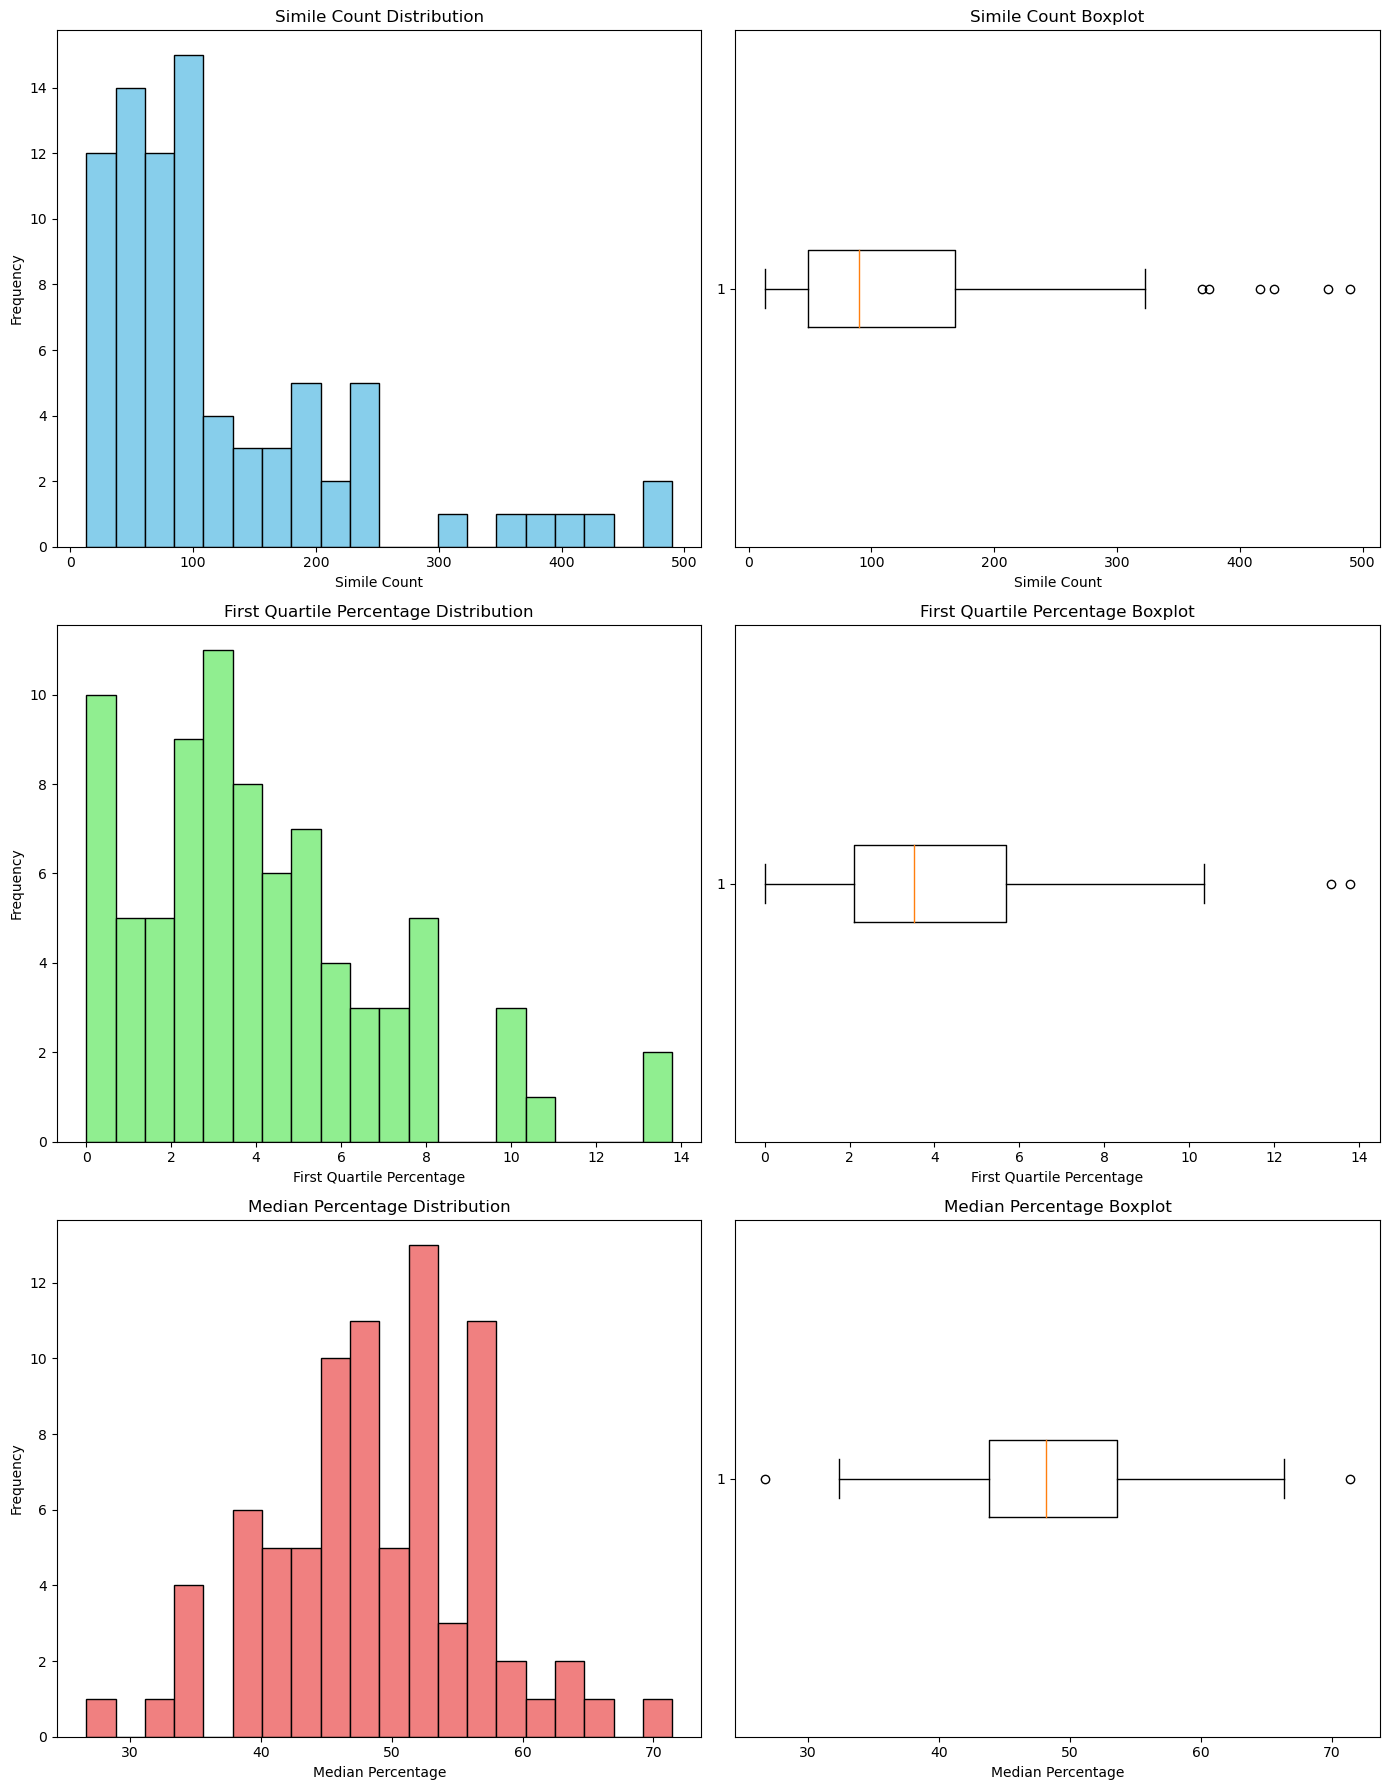

In [104]:
# data description
description = df.describe()
print(description)

# plot
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

# distribution plot
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

columns = ['Simile Count', 'First Quartile Percentage', 'Median Percentage']
colors = ['skyblue', 'lightgreen', 'lightcoral', ]

for i, column in enumerate(columns):
    axes[i, 0].hist(df[column], bins=20, color=colors[i], edgecolor='black')
    axes[i, 0].set_title(f'{column} Distribution')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    fig.savefig(f'plots/{column.lower().replace(" ", "_")}_histogram.png')

    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_title(f'{column} Boxplot')
    axes[i, 1].set_xlabel(column)
    fig.savefig(f'plots/{column.lower().replace(" ", "_")}_boxplot.png')

plt.tight_layout()

fig.savefig('plots/data_distribution_plots.png')
plt.show()


In [105]:
X = df[["Simile Count", "First Quartile Percentage", "Median Percentage"]]
y = df["Reordered Rank"]

# 添加常数项
X = sm.add_constant(X)

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归分析结果
results_summary = model.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:         Reordered Rank   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.237
Date:                Thu, 13 Jun 2024   Prob (F-statistic):            0.00792
Time:                        17:04:47   Log-Likelihood:                -369.63
No. Observations:                  82   AIC:                             747.3
Df Residuals:                      78   BIC:                             756.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [108]:
with open('regression_results.tex', 'w') as f:
    f.write(results_summary.as_latex())
with open('regression_results.txt', 'w') as f:
    f.write(results_summary.as_text())
with open('regression_results.html', 'w') as f:
    f.write(results_summary.as_html())

In [109]:
from scipy import stats
residuals = model.resid
shapiro_test = stats.shapiro(residuals)

print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test:
Test Statistic: 0.9716033339500427
P-value: 0.06566905230283737


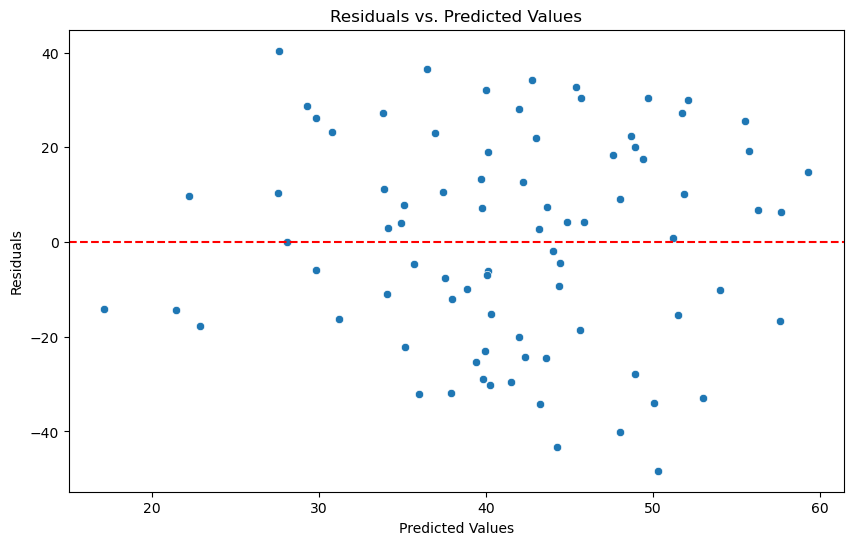

In [110]:
import seaborn as sns
predicted_values = model.predict()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adding a horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                     Feature        VIF
0                      const  38.902770
1               Simile Count   1.075188
2  First Quartile Percentage   1.007735
3          Median Percentage   1.069288
